<center>
<img
src="https://cdn.pet-techo.com/attachments/89b29a274c35bd4ddffa35787fadde190e7d8bee/store/fit/750/750/11d8fa6d0148fa7c64b76de67e166b7e1398155c20446fed51c77bcc4705/catch_image.jpg" width=400 height=200 />
</center>

**1.Data　Load**

In [1]:
options(warn = -1)

In [2]:
train <- read.csv("/kaggle/input/playground-series-s4e12/train.csv", row.names= 1) #set id as rowname
test <- read.csv("/kaggle/input/playground-series-s4e12/test.csv") #set id as rowname
submit = read.csv("/kaggle/input/playground-series-s4e12/sample_submission.csv")

In [3]:
id<-test[,1]　

In [4]:
str(train)

'data.frame':	1200000 obs. of  20 variables:
 $ Age                 : num  19 39 23 21 21 29 41 48 21 44 ...
 $ Gender              : chr  "Female" "Female" "Male" "Male" ...
 $ Annual.Income       : num  10049 31678 25602 141855 39651 ...
 $ Marital.Status      : chr  "Married" "Divorced" "Divorced" "Married" ...
 $ Number.of.Dependents: num  1 3 3 2 1 1 0 2 3 2 ...
 $ Education.Level     : chr  "Bachelor's" "Master's" "High School" "Bachelor's" ...
 $ Occupation          : chr  "Self-Employed" "" "Self-Employed" "" ...
 $ Health.Score        : num  22.6 15.6 47.2 10.9 20.4 ...
 $ Location            : chr  "Urban" "Rural" "Suburban" "Rural" ...
 $ Policy.Type         : chr  "Premium" "Comprehensive" "Premium" "Basic" ...
 $ Previous.Claims     : num  2 1 1 1 0 2 2 1 1 1 ...
 $ Vehicle.Age         : num  17 12 14 0 8 4 8 11 10 9 ...
 $ Credit.Score        : num  372 694 NA 367 598 614 807 398 685 635 ...
 $ Insurance.Duration  : num  5 2 3 1 4 5 6 5 8 3 ...
 $ Policy.Start.Date   : ch

In [5]:
library(RColorBrewer) #custom colors
library(corrplot)
library(xgboost) # for xgboost
library(GGally)
library(summarytools)
library(inspectdf)
library(dplyr)
library(modeltime)
library(timetk)
library(forecast)
library(ggplot2)
library(tidymodels)
library(tidyverse)
library(rsample)
library(withr)
library(skimr)
library(summarytools)
library(bonsai)
library(lubridate)
library(urca)
library(tseries)
library(bonsai)
library(lubridate)
library(catboost)
library(kableExtra)
install.packages("stacks")
library(stacks)

corrplot 0.92 loaded



Loading required package: ggplot2



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)




Attaching package: ‘dplyr’




The following object is masked from ‘package:xgboost’:

    slice




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tibble       3.2.1 
✔ infer        1.0.7      ✔ tidyr        1.3.1 
✔ modeldata    1.4.0      ✔ tune         1.2.1 
✔ parsnip      1.2.1      ✔ workflows    1.1.4 
✔ purrr        1.0.2      ✔ workflowsets 1.1.0 
✔ recipes      1.0.10     ✔ yardstick    1.3.1 



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ yardstick::accuracy() masks forecast::accuracy()
✖ purrr::discard()      masks scales::discard()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::lag()          masks stats::lag()
✖ dplyr::slice()        masks xgboost::slice()
✖ recipes::step()       masks stats::step()
✖ tibble::view()        masks summarytools::view()
• Search for functions across packages at https://www.tidymodels.org/find/



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::slice()      masks xgboost::slice()
✖ readr::spec()       masks yardstick::spec()
✖ tibble::view()      masks summarytools::view()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘kableExtra’




The following object is masked from ‘package:dplyr’:

    group_rows




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**2let's take a look at the distribution of each class.**.

In [6]:
str(train)

'data.frame':	1200000 obs. of  20 variables:
 $ Age                 : num  19 39 23 21 21 29 41 48 21 44 ...
 $ Gender              : chr  "Female" "Female" "Male" "Male" ...
 $ Annual.Income       : num  10049 31678 25602 141855 39651 ...
 $ Marital.Status      : chr  "Married" "Divorced" "Divorced" "Married" ...
 $ Number.of.Dependents: num  1 3 3 2 1 1 0 2 3 2 ...
 $ Education.Level     : chr  "Bachelor's" "Master's" "High School" "Bachelor's" ...
 $ Occupation          : chr  "Self-Employed" "" "Self-Employed" "" ...
 $ Health.Score        : num  22.6 15.6 47.2 10.9 20.4 ...
 $ Location            : chr  "Urban" "Rural" "Suburban" "Rural" ...
 $ Policy.Type         : chr  "Premium" "Comprehensive" "Premium" "Basic" ...
 $ Previous.Claims     : num  2 1 1 1 0 2 2 1 1 1 ...
 $ Vehicle.Age         : num  17 12 14 0 8 4 8 11 10 9 ...
 $ Credit.Score        : num  372 694 NA 367 598 614 807 398 685 635 ...
 $ Insurance.Duration  : num  5 2 3 1 4 5 6 5 8 3 ...
 $ Policy.Start.Date   : ch

In [7]:
str(test)

'data.frame':	800000 obs. of  20 variables:
 $ id                  : int  1200000 1200001 1200002 1200003 1200004 1200005 1200006 1200007 1200008 1200009 ...
 $ Age                 : num  28 31 47 28 24 43 21 44 32 48 ...
 $ Gender              : chr  "Female" "Female" "Female" "Female" ...
 $ Annual.Income       : num  2310 126031 17092 30424 10863 ...
 $ Marital.Status      : chr  "" "Married" "Divorced" "Divorced" ...
 $ Number.of.Dependents: num  4 2 0 3 2 2 3 3 4 2 ...
 $ Education.Level     : chr  "Bachelor's" "Master's" "PhD" "PhD" ...
 $ Occupation          : chr  "Self-Employed" "Self-Employed" "Unemployed" "Self-Employed" ...
 $ Health.Score        : num  7.66 13.38 24.35 5.14 11.84 ...
 $ Location            : chr  "Rural" "Suburban" "Urban" "Suburban" ...
 $ Policy.Type         : chr  "Basic" "Premium" "Comprehensive" "Comprehensive" ...
 $ Previous.Claims     : num  NA NA NA 1 NA NA 1 NA 0 1 ...
 $ Vehicle.Age         : num  19 14 16 3 14 15 14 8 1 15 ...
 $ Credit.Score  

**3.Let's take a look at the distribution of categorical data.**

In [8]:
a <- ggplot(train, aes(x = Gender, fill = Gender)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Gender", x = "Gender", y = "Count") +
  theme_minimal()

In [9]:
b <- ggplot(train, aes(x = Marital.Status, fill =  Marital.Status)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Marital.Status", x = "Marital.Status", y = "Count")

In [10]:
c <- ggplot(train, aes(x = Education.Level, fill =  Education.Level)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Education.Level", x = "Education.Level", y = "Count")

In [11]:
d <- ggplot(train, aes(x = Occupation, fill =  Occupation)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Occupation", x = "Occupation", y = "Count")

In [12]:
e <- ggplot(train, aes(x = Location, fill =  Location)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Location", x = "Location", y = "Count")

In [13]:
f <- ggplot(train, aes(x = Policy.Type, fill =  Policy.Type)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Policy.Type", x = "Policy.Type", y = "Count")

In [14]:
#g <- ggplot(train, aes(x = Policy.Start.Date, fill = Policy.Start.Date)) +
#  geom_bar(position = "dodge") +
#  labs(title = "Count of Policy.Start.Date", x = "Policy.Start.Date", y = "Count")

In [15]:
h <- ggplot(train, aes(x = Customer.Feedback, fill =  Customer.Feedback)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Customer.Feedback", x = "Customer.Feedback", y = "Count")

In [16]:
i <- ggplot(train, aes(x = Smoking.Status, fill =  Smoking.Status)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Smoking.Status", x = "Smoking.Status", y = "Count")

In [17]:
j <- ggplot(train, aes(x = Exercise.Frequency, fill =  Exercise.Frequency)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Exercise.Frequency", x = "Exercise.Frequency", y = "Count")

In [18]:
k <- ggplot(train, aes(x = Property.Type, fill =  Property.Type)) +
  geom_bar(position = "dodge") +
  labs(title = "Count of Property.Type", x = "Property.Type", y = "Count")

In [19]:
aa<-ggplot(train, aes(x = Gender, y = Premium.Amount, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Gender", 
       x = "Gender", 
       y = "Premium Amount") +
  theme_minimal()

In [20]:
bb <- ggplot(train, aes(x = Marital.Status,  y = Premium.Amount,fill =  Marital.Status)) +
  geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Marital.Status", 
       x = "Marital.Status", 
       y = "Premium Amount") +
  theme_minimal()

In [21]:
cc <- ggplot(train, aes(x = Education.Level, y = Premium.Amount,fill =  Education.Level)) +
   geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Education.Level", 
       x = "Education.Level", 
       y = "Premium Amount") +
  theme_minimal()

In [22]:
dd <- ggplot(train, aes(x = Occupation,y = Premium.Amount, fill =  Occupation)) +
    geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Occupation", 
       x = "Occupation", 
       y = "Premium Amount") +
  theme_minimal()

In [23]:
ee <- ggplot(train, aes(x = Location,y = Premium.Amount, fill =  Location)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Location", 
       x = "Location", 
       y = "Premium Amount") +
  theme_minimal()

In [24]:
ff <- ggplot(train, aes(x = Policy.Type,y = Premium.Amount, fill =  Policy.Type)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Policy.Type", 
       x = "Policy.Type", 
       y = "Premium Amount") +
  theme_minimal()

In [25]:
#gg <- ggplot(train, aes(x = Policy.Start.Date,y = Premium.Amount, fill = Policy.Start.Date)) +
#      geom_boxplot() +
#  labs(title = "Boxplot of Premium Amount by Policy.Start.Date", 
#       x = "Policy.Start.Date", 
#       y = "Premium Amount") +
#  theme_minimal()

In [26]:
hh <- ggplot(train, aes(x = Customer.Feedback,y = Premium.Amount, fill =  Customer.Feedback)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Customer.Feedback", 
       x = "Customer.Feedback", 
       y = "Premium Amount") +
  theme_minimal()

In [27]:
ii <- ggplot(train, aes(x = Smoking.Status,y = Premium.Amount,  fill =  Smoking.Status)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Smoking.Status", 
       x = "Smoking.Status", 
       y = "Premium Amount") +
  theme_minimal()

In [28]:
jj <- ggplot(train, aes(x = Exercise.Frequency,y = Premium.Amount, fill =  Exercise.Frequency)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Exercise.Frequency", 
       x = "Exercise.Frequency", 
       y = "Premium Amount") +
  theme_minimal()

In [29]:
kk <- ggplot(train, aes(x = Property.Type, y = Premium.Amount,fill =  Property.Type)) +
      geom_boxplot() +
  labs(title = "Boxplot of Premium Amount by Property.Type", 
       x = "Property.Type", 
       y = "Premium Amount") +
  theme_minimal()

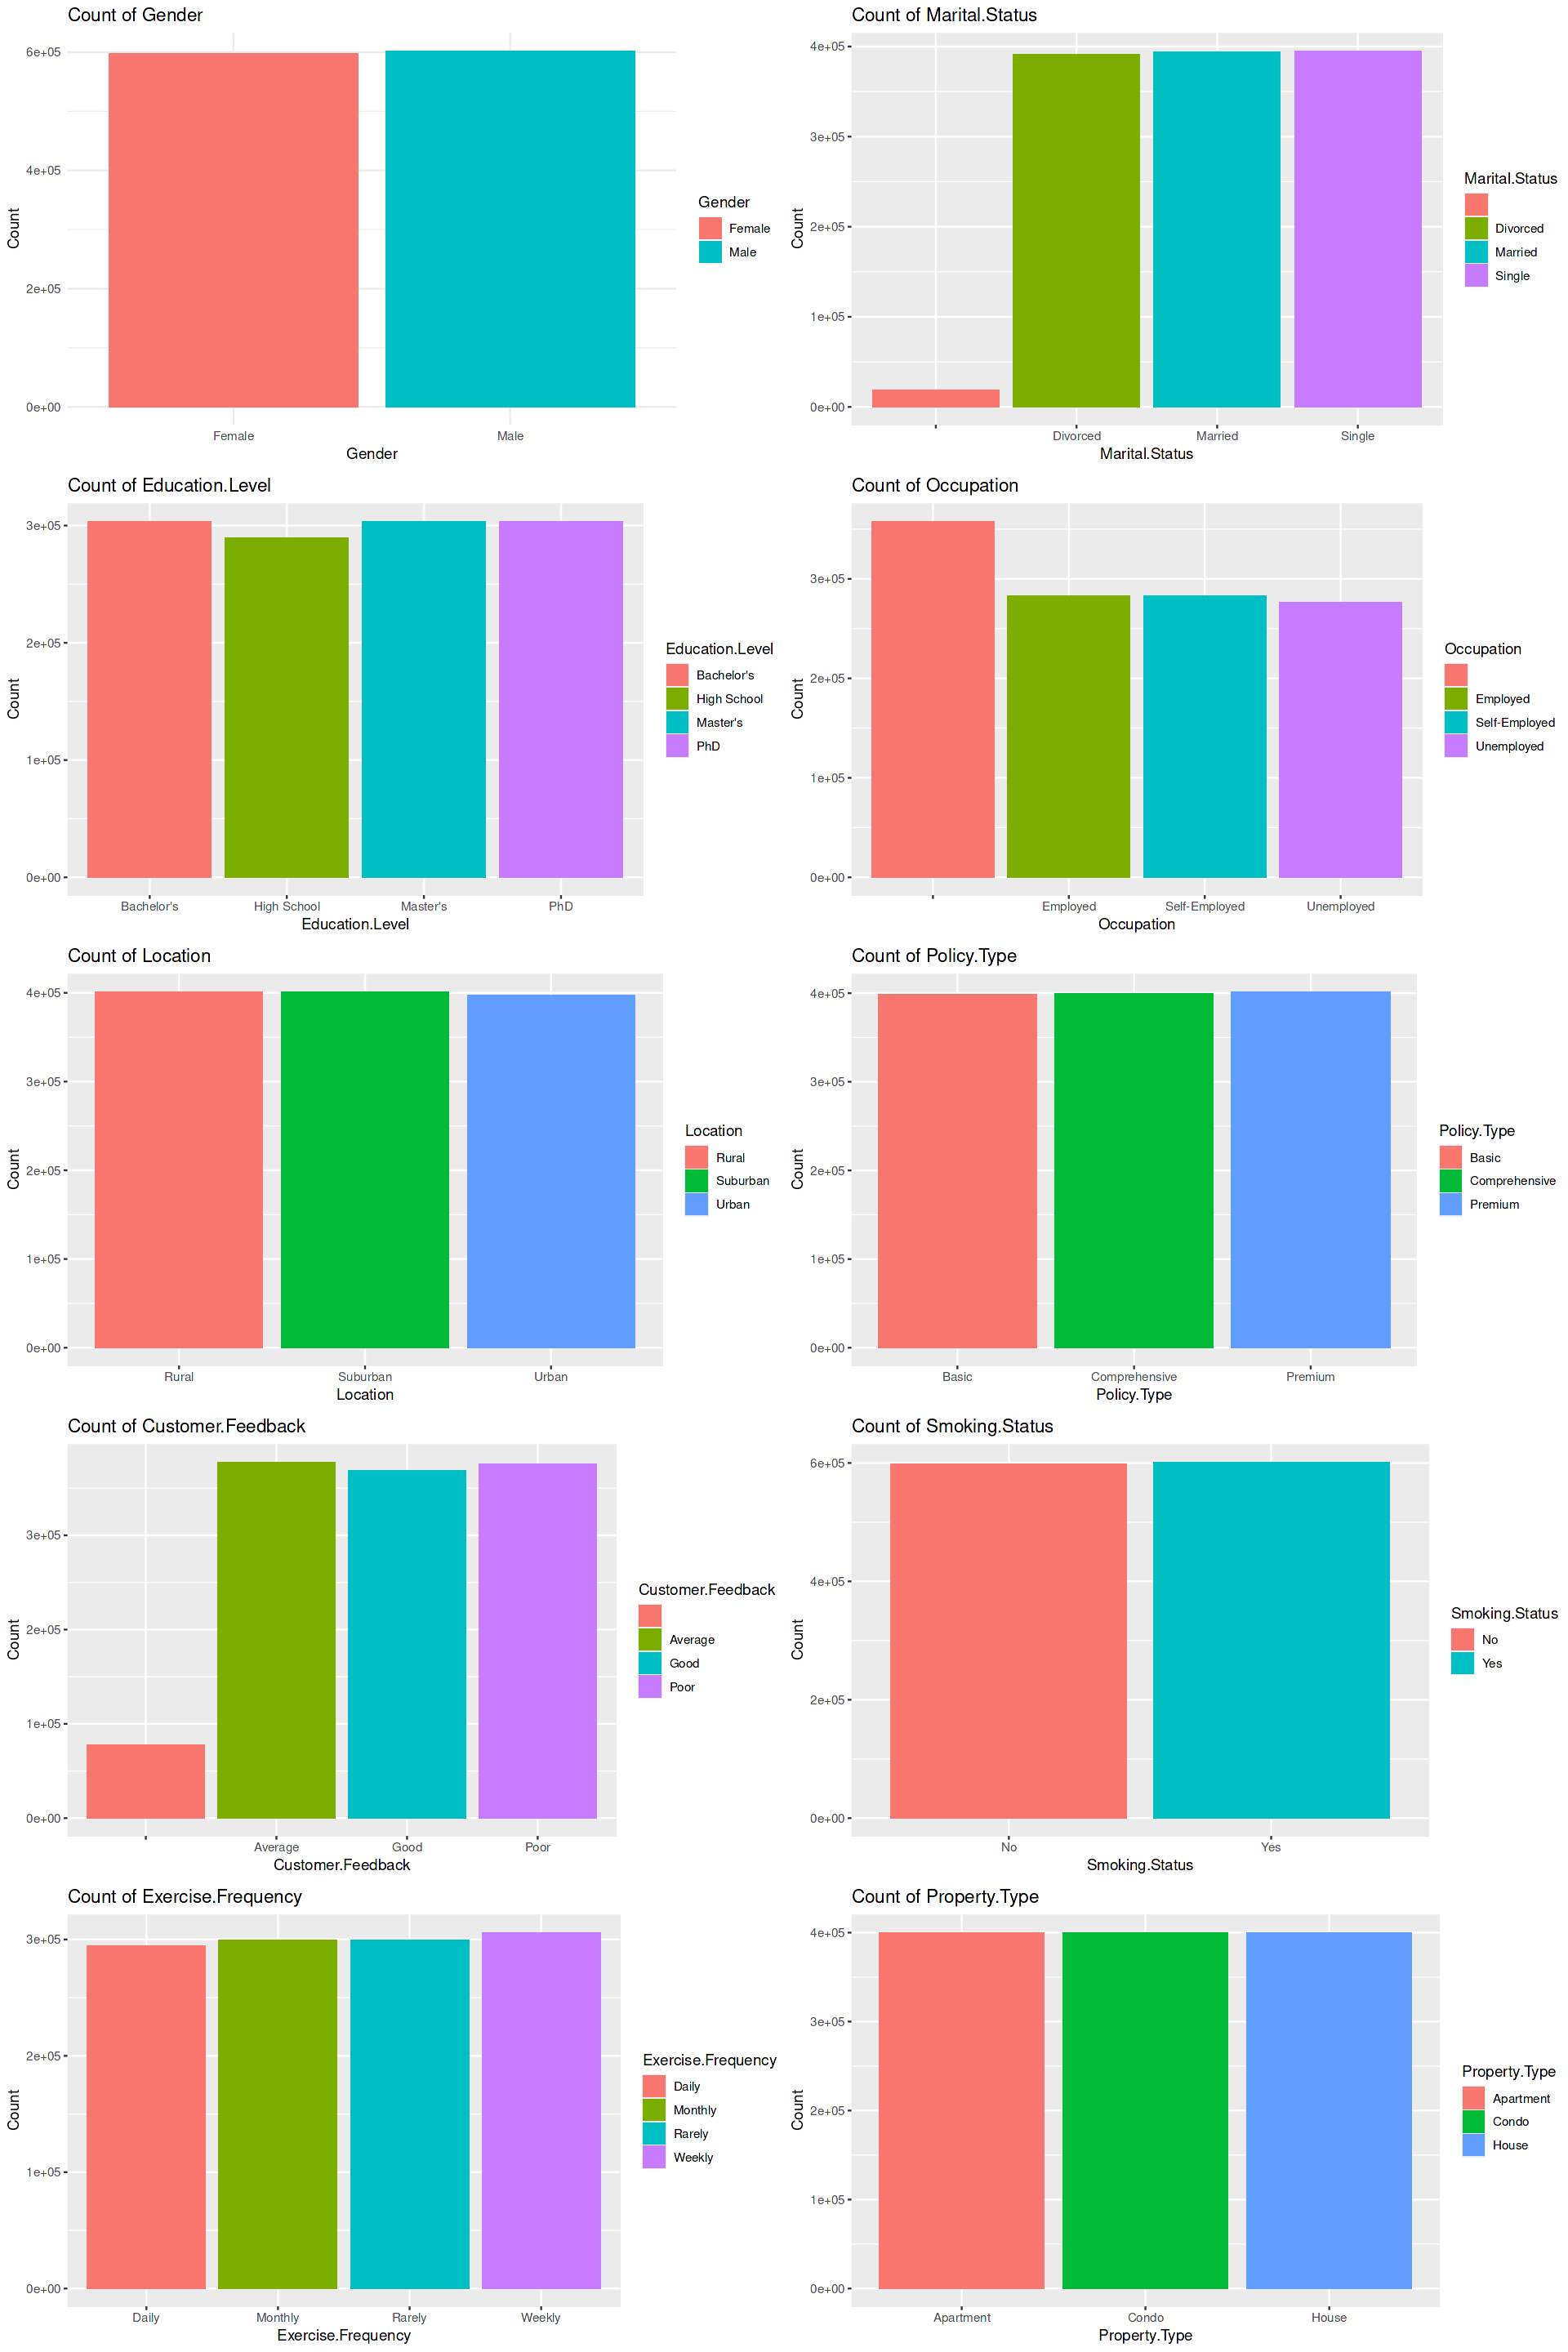

In [30]:
options(
  repr.plot.width = 16,   
  repr.plot.height = 24   
)
gridExtra::grid.arrange(a,b,c,d,e,f,h,i,j,k,ncol = 2,widths = c(15, 15))

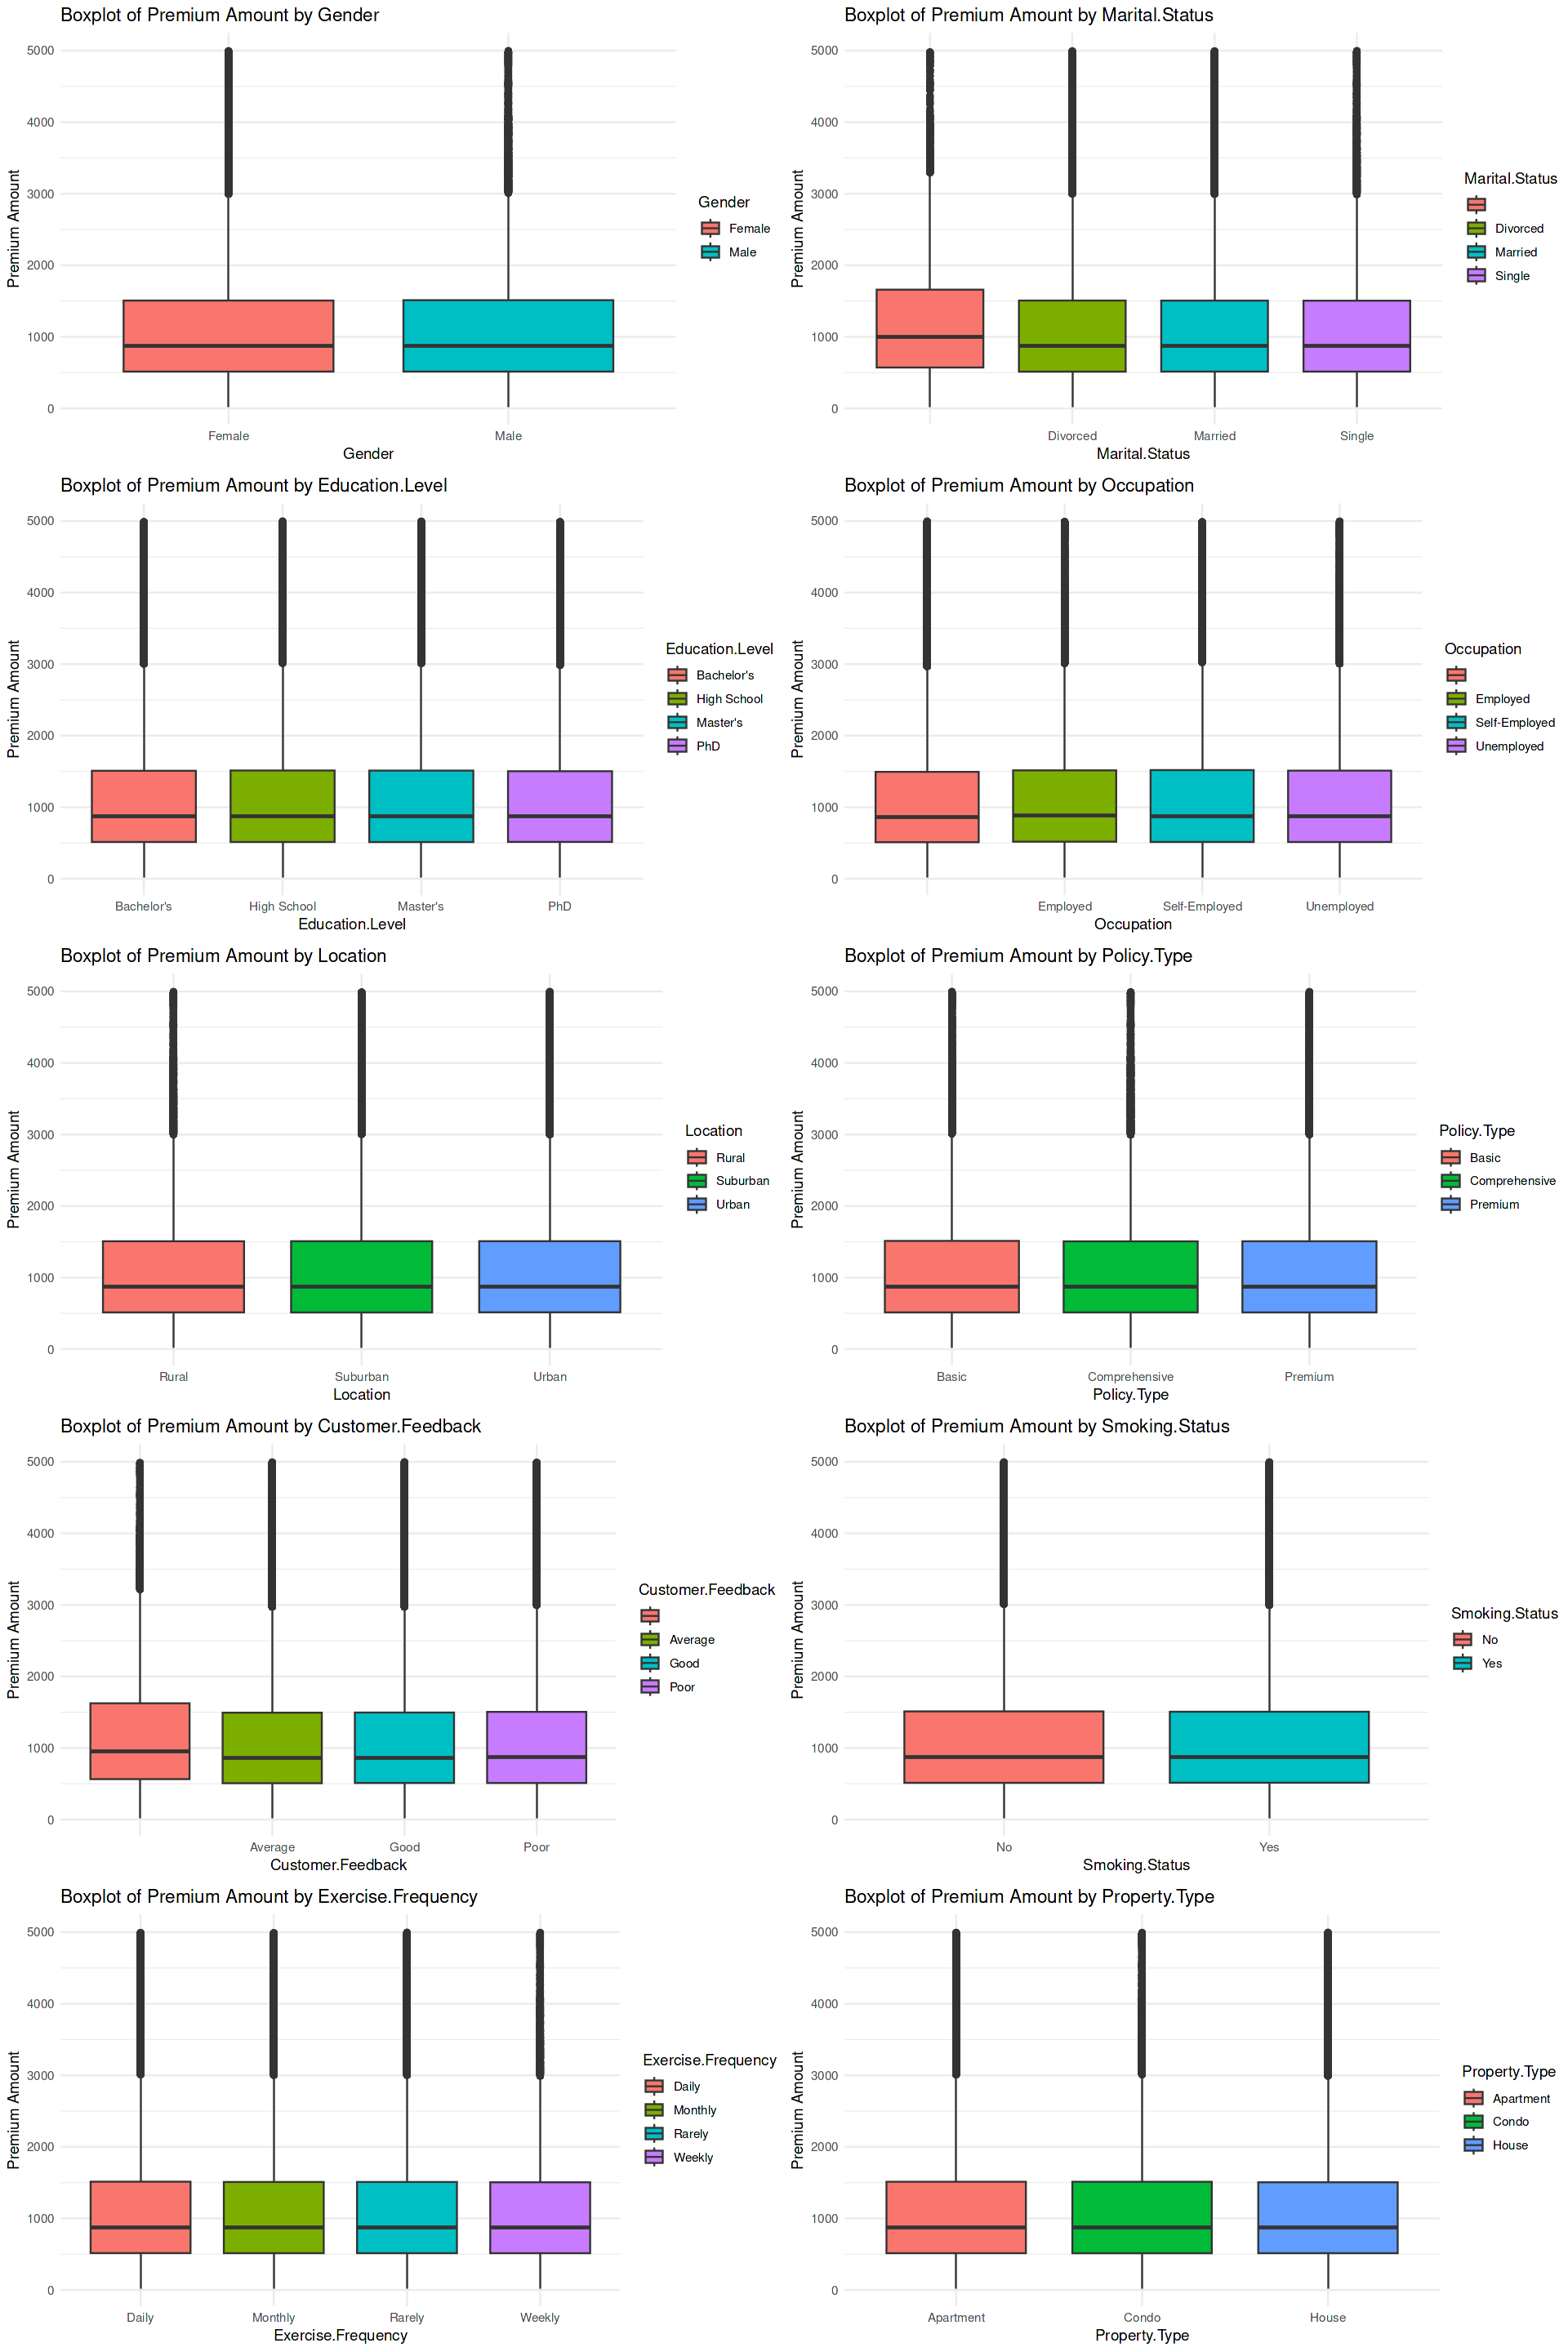

In [31]:
options(
  repr.plot.width = 16,   
  repr.plot.height = 24   
)
gridExtra::grid.arrange(aa,bb,cc,dd,ee,ff,hh,ii,jj,kk,ncol = 2,widths = c(15, 15))

**4.Let's take a look at the distribution of numerical data**

In [32]:
l <- ggplot(train, aes(x = Age , fill =  Premium.Amount)) +
   geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Age with Premium Amount",
    x = "Age",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [33]:
m <- ggplot(train, aes(x = Annual.Income , fill =  Premium.Amount)) +
   geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Annual.Income with Premium Amount",
    x = "Annual.Income",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [34]:
n <- ggplot(train, aes(x = Number.of.Dependents , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Number.of.Dependents with Premium Amount",
    x = "Number.of.Dependents",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [35]:
o <- ggplot(train, aes(x = Health.Score  , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Health.Score with Premium Amount",
    x = "Health.Score",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [36]:
p <- ggplot(train, aes(x = Previous.Claims  , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Previous.Claims with Premium Amount",
    x = "Previous.Claims",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [37]:
q <- ggplot(train, aes(x = Vehicle.Age  , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Vehicle.Age with Premium Amount",
    x = "Vehicle.Age",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [38]:
r <- ggplot(train, aes(x = Credit.Score  , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Credit.Score with Premium Amount",
    x = "Credit.Score",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

In [39]:
s <- ggplot(train, aes(x = Insurance.Duration  , fill =  Premium.Amount)) +
     geom_histogram(binwidth = 5, color = "white") +  # 例として幅を5に設定
  labs(
    title = "Histogram of Insurance.Duration with Premium Amount",
    x = "Insurance.Duration",
    y = "Count"
  ) +
  scale_fill_gradient(low = "blue", high = "red") + 
  theme_minimal()

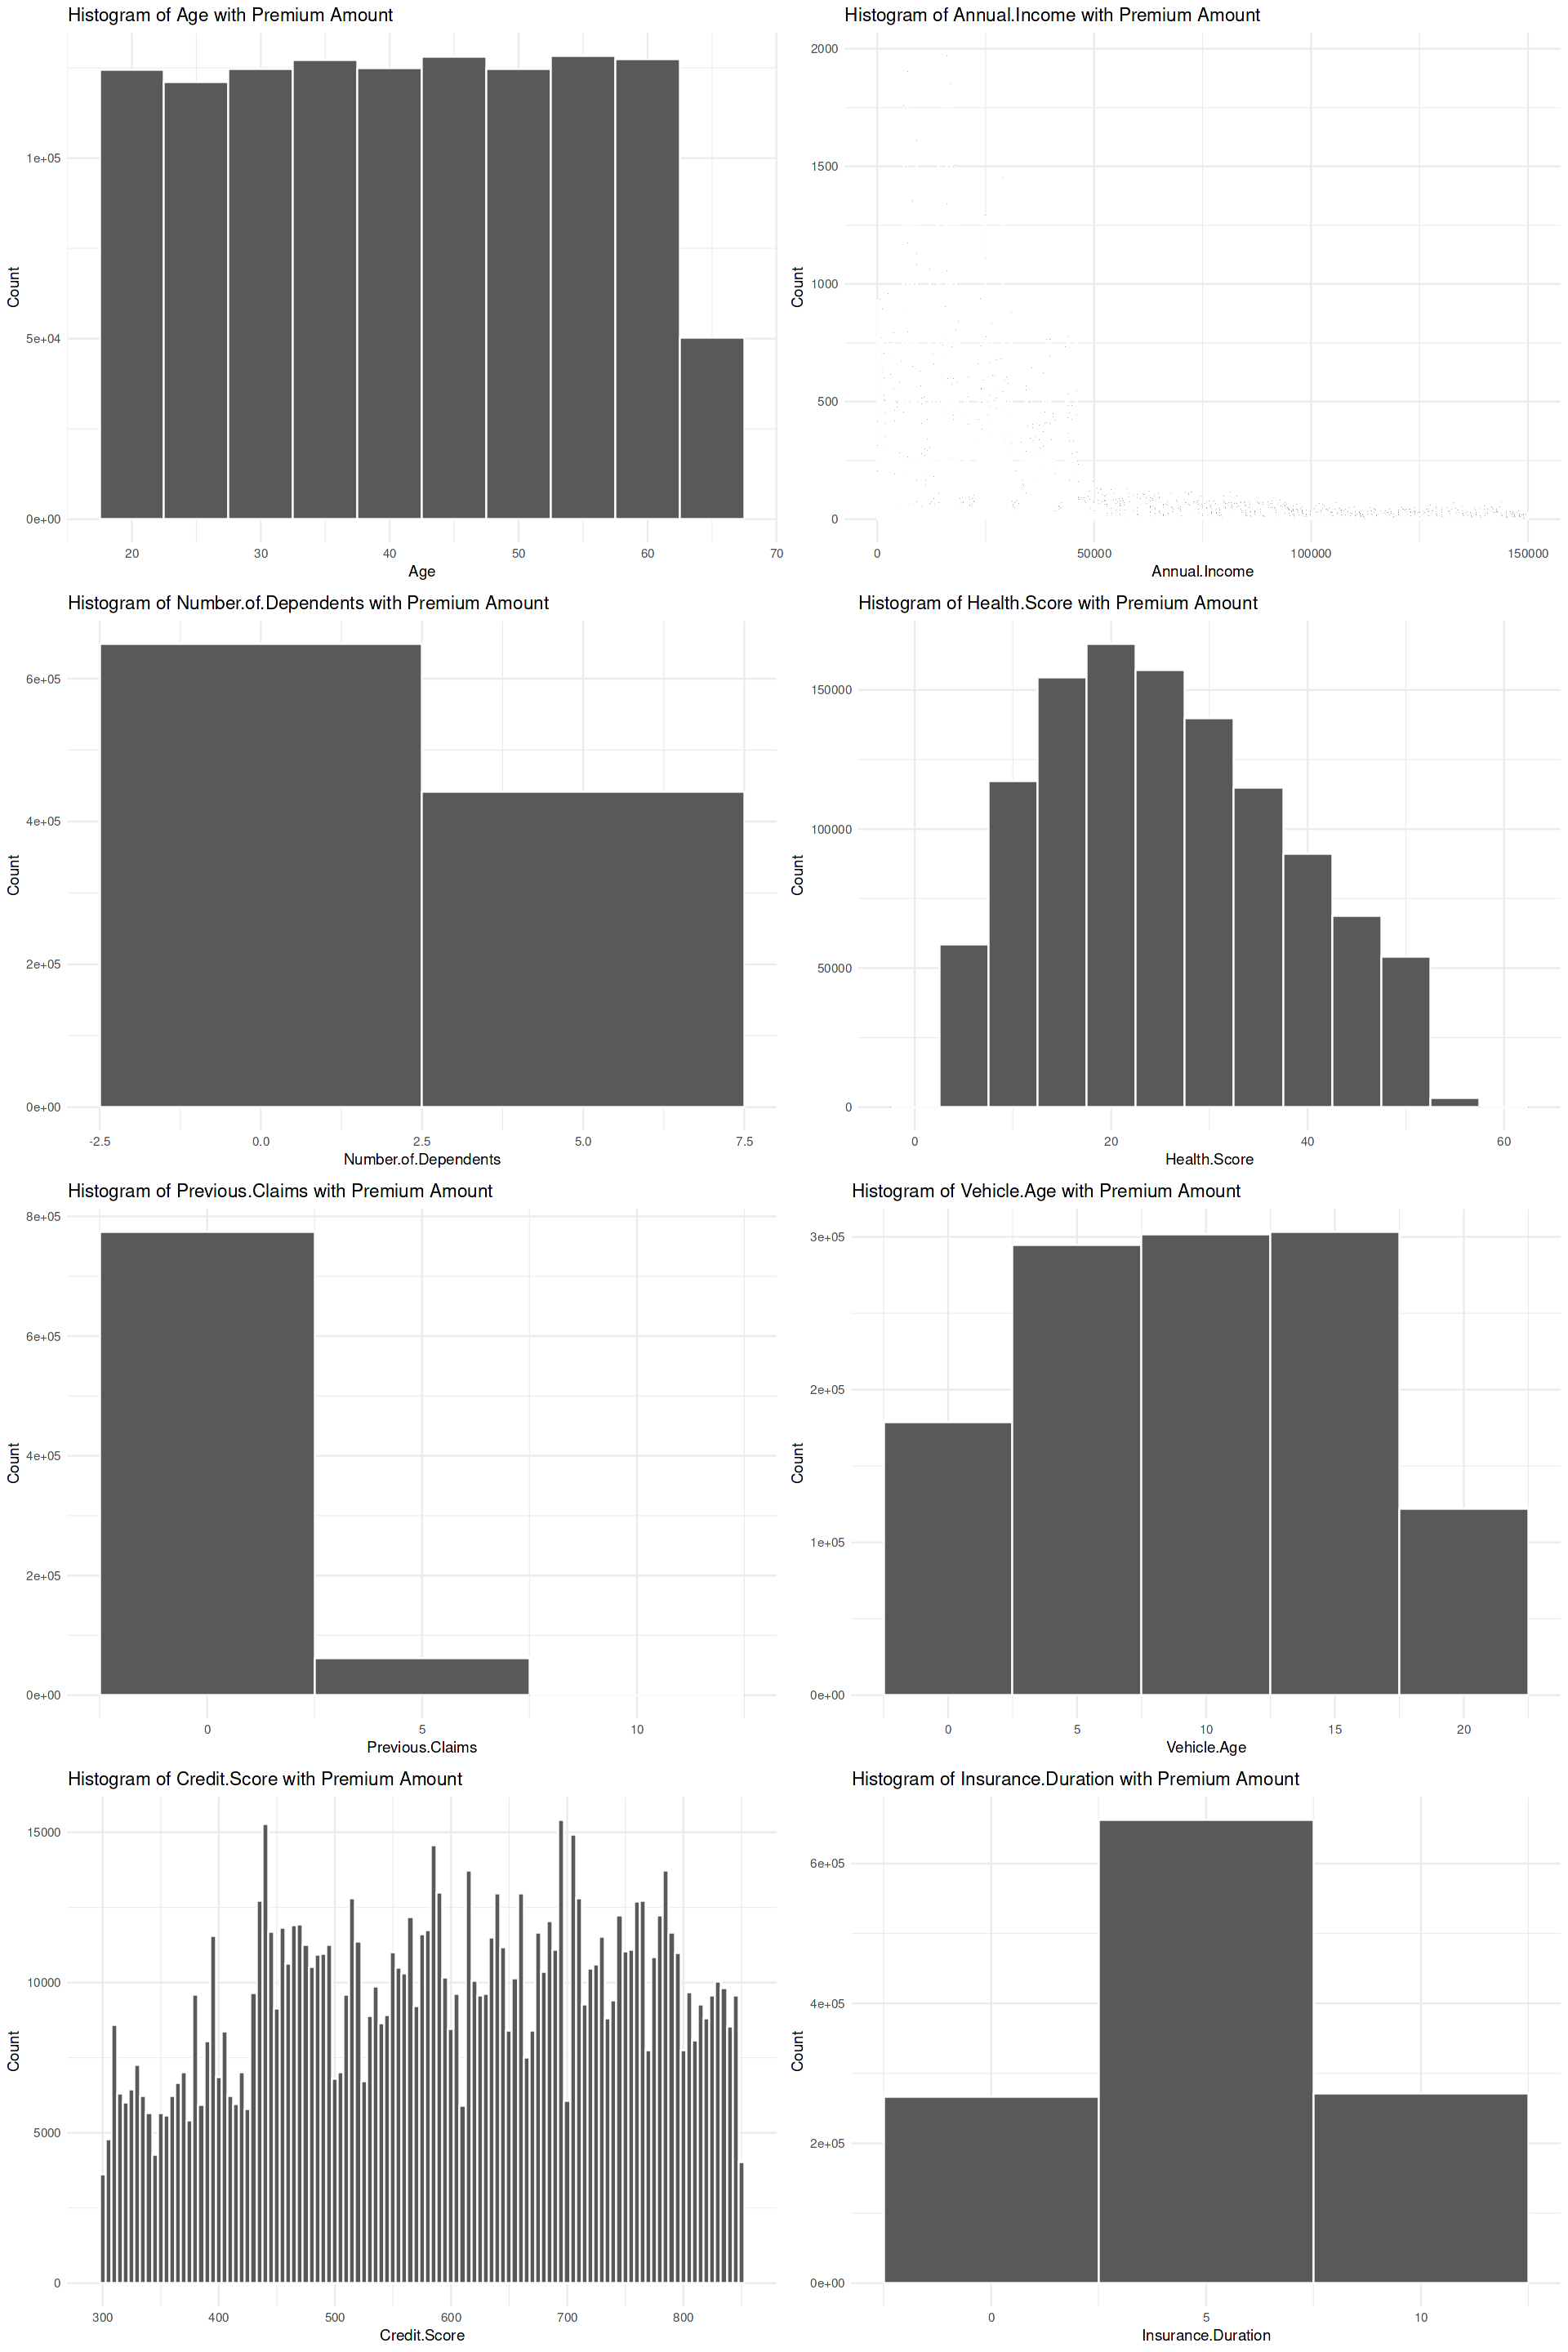

In [40]:
options(
  repr.plot.width = 16,   
  repr.plot.height = 24   
)
gridExtra::grid.arrange(l,m,n,o,p,q,r,s,ncol = 2,widths = c(15, 15))

**5.Create a heatmap**

In [41]:
train2<-data.frame(lapply(train, function(x) {
  if (all(is.na(as.numeric(as.character(x))))) {
    return(x)
  } else {
    return(as.numeric(as.character(x)))
  }
}))


Attaching package: ‘reshape2’




The following object is masked from ‘package:tidyr’:

    smiths




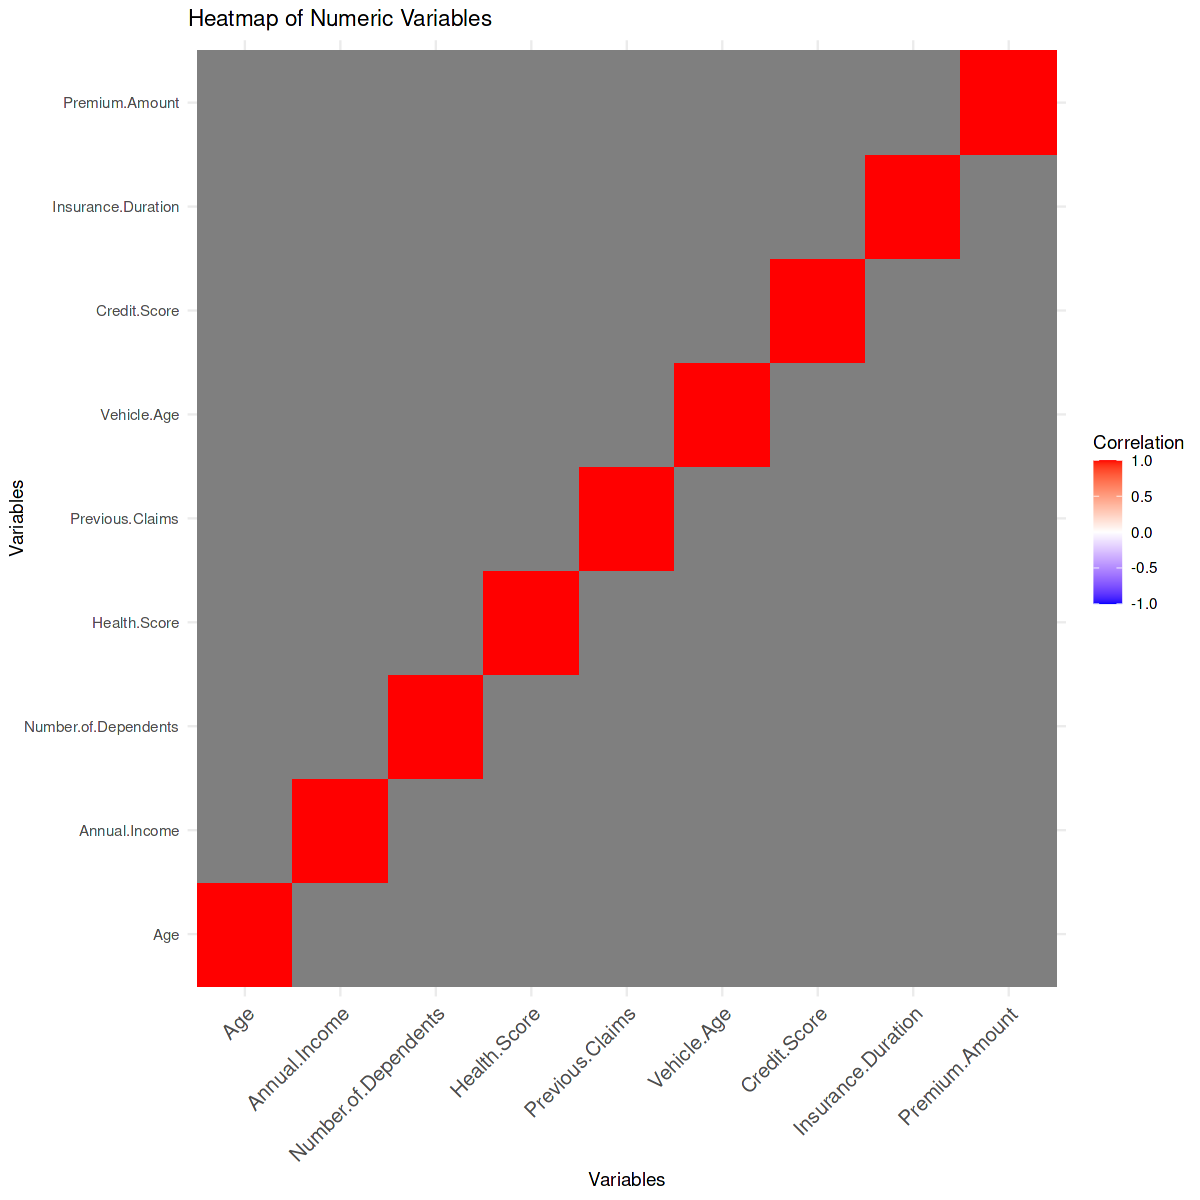

In [42]:
options(
  repr.plot.width = 10,   
  repr.plot.height = 10   
)
library(reshape2)

numeric_data <- train2[, sapply(train2, is.numeric)]

melted_data <- melt(cor(numeric_data))

ggplot(data = melted_data, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() + 
  labs(title = "Heatmap of Numeric Variables", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                  size = 12, hjust = 1))

In [43]:
library(lubridate)

# 'Policy Start Date'
train <- train %>%
  mutate(`Policy.Start.Date` = as.Date(`Policy.Start.Date`, format = "%Y-%m-%d")) %>%
  
  # 年、月、日、曜日などを抽出
  mutate(
    Year = year(`Policy.Start.Date`),
    Day = day(`Policy.Start.Date`),
    Month = month(`Policy.Start.Date`),
    Month_name = month(`Policy.Start.Date`, label = TRUE, abbr = FALSE),
    Day_of_week = wday(`Policy.Start.Date`, label = TRUE, abbr = FALSE, week_start = 1),
    Week = isoweek(`Policy.Start.Date`)
  ) %>%
  
  # サイン・コサイン変換 (周期的な変数のエンコーディング)
  mutate(
    Year_sin = sin(2 * pi * Year),
    Year_cos = cos(2 * pi * Year),
    Month_sin = sin(2 * pi * Month / 12),
    Month_cos = cos(2 * pi * Month / 12),
    Day_sin = sin(2 * pi * Day / 31),
    Day_cos = cos(2 * pi * Day / 31),
    
    # Group変数を生成 (Pythonの//は整数除算)
    Group = (Year - 2020) * 48 + Month * 4 + floor(Day / 7)
  ) %>%
  
  # 'Policy Start Date'列を削除
  select(-`Policy.Start.Date`)


test <- test %>%
  mutate(`Policy.Start.Date` = as.Date(`Policy.Start.Date`, format = "%Y-%m-%d")) %>%
  
  # 年、月、日、曜日などを抽出
  mutate(
    Year = year(`Policy.Start.Date`),
    Day = day(`Policy.Start.Date`),
    Month = month(`Policy.Start.Date`),
    Month_name = month(`Policy.Start.Date`, label = TRUE, abbr = FALSE),
    Day_of_week = wday(`Policy.Start.Date`, label = TRUE, abbr = FALSE, week_start = 1),
    Week = isoweek(`Policy.Start.Date`)
  ) %>%
  
  # サイン・コサイン変換 (周期的な変数のエンコーディング)
  mutate(
    Year_sin = sin(2 * pi * Year),
    Year_cos = cos(2 * pi * Year),
    Month_sin = sin(2 * pi * Month / 12),
    Month_cos = cos(2 * pi * Month / 12),
    Day_sin = sin(2 * pi * Day / 31),
    Day_cos = cos(2 * pi * Day / 31),
    
    # Group変数を生成 (Pythonの//は整数除算)
    Group = (Year - 2020) * 48 + Month * 4 + floor(Day / 7)
  ) %>%
  
  # 'Policy Start Date'列を削除
  select(-`Policy.Start.Date`)


In [44]:
#train$annual_income_health_score_ratio<-train$Health.Score / train$Annual.Income
#train$annual_income_age_ratio<-train$Annual.Income/train$Age
#train$credit_age<-train$Credit.Score/train$Age
#train$vehicle_age_insurance_duration<-train$Vehicle.Age/train$Insurance.Duration

#test$annual_income_health_score_ratio<-test$Health.Score / test$Annual.Income
#test$annual_income_age_ratio<-test$Annual.Income/test$Age
#test$credit_age<-test$Credit.Score/test$Age
#test$vehicle_age_insurance_duration<-test$Vehicle.Age/test$Insurance.Duration

**6.Creat QQ PLOT**

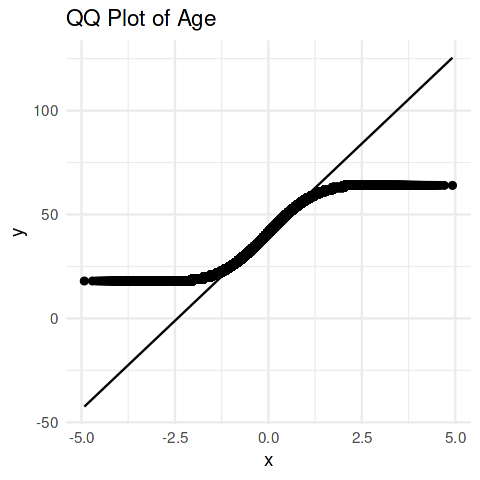

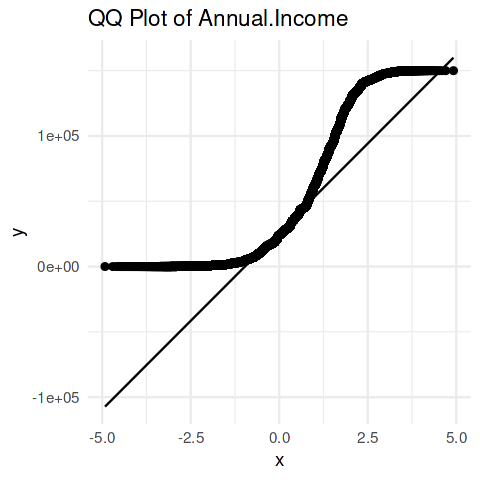

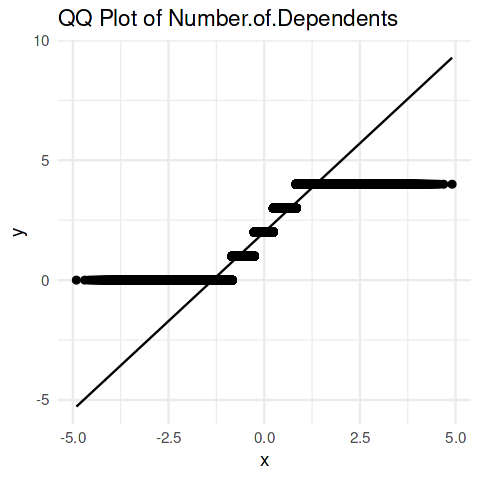

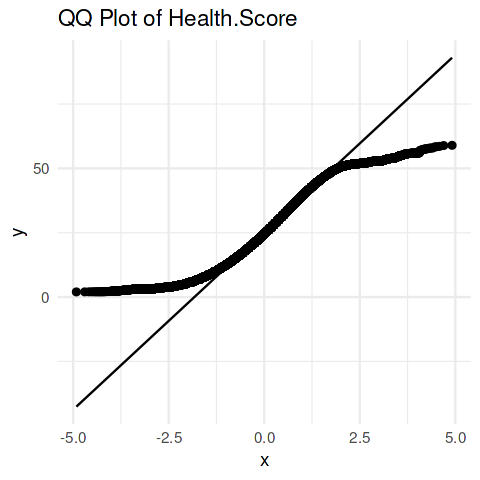

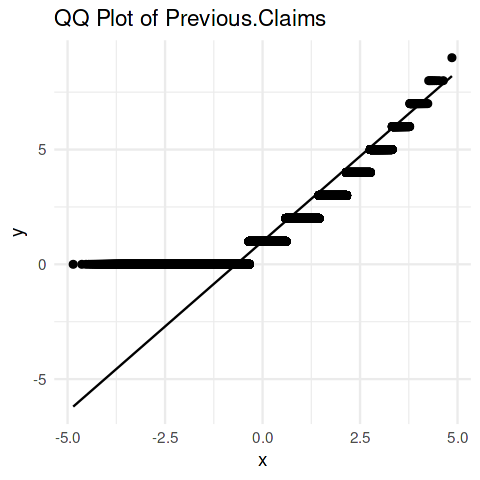

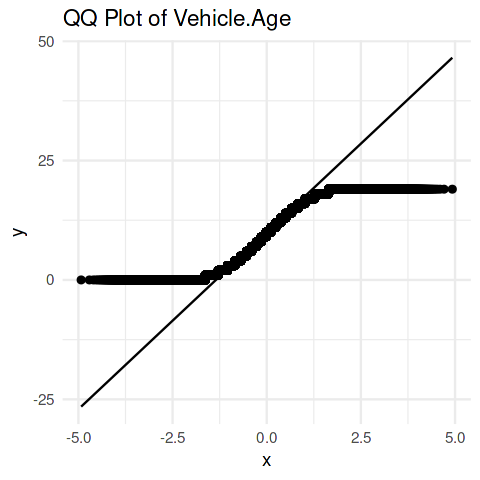

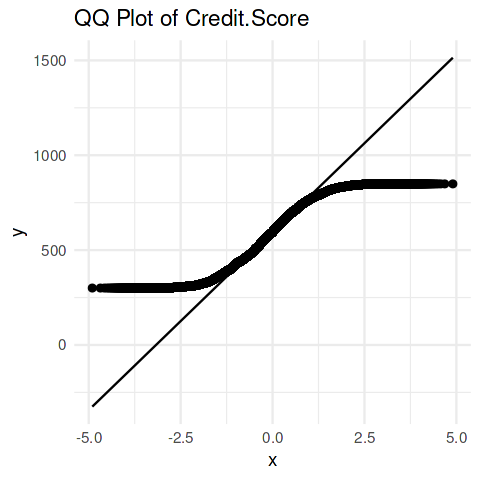

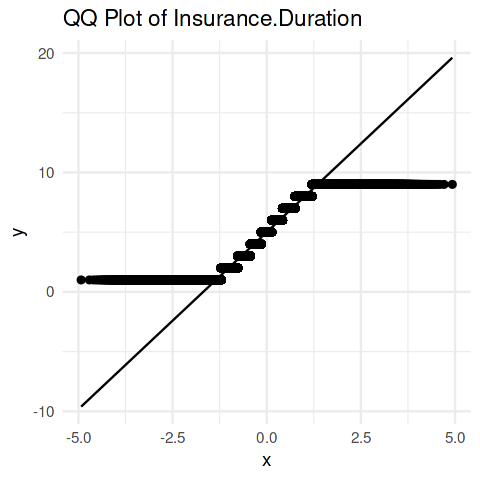

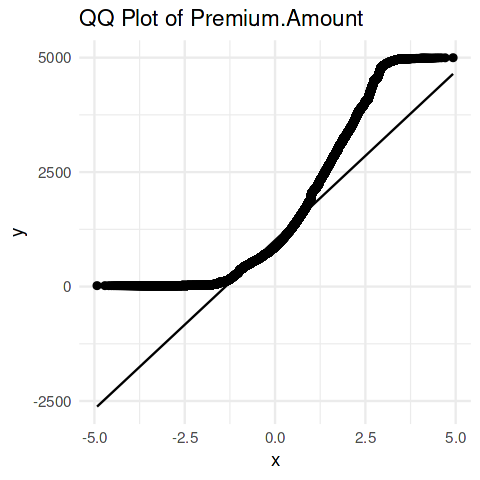

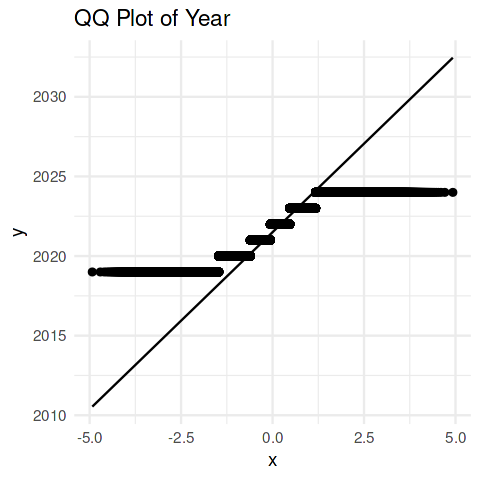

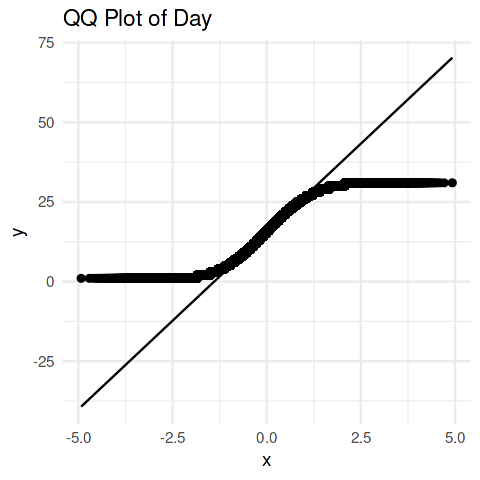

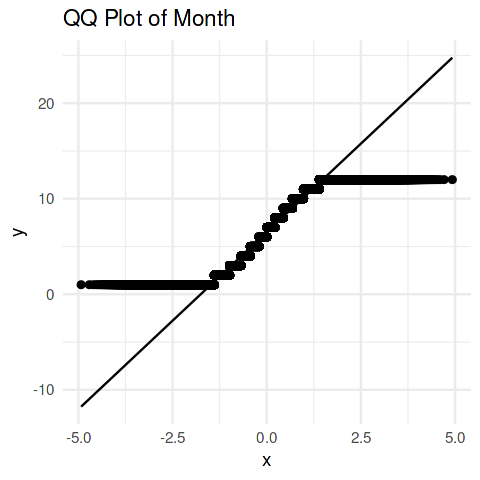

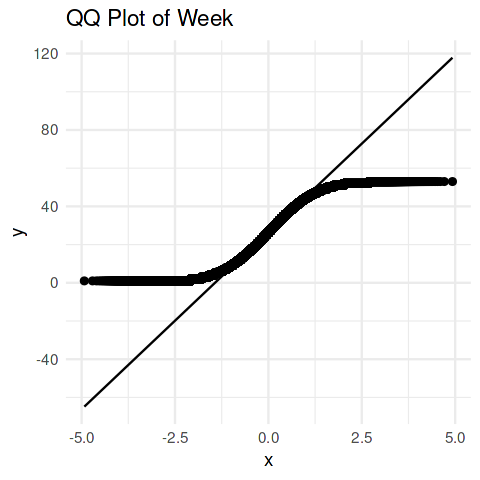

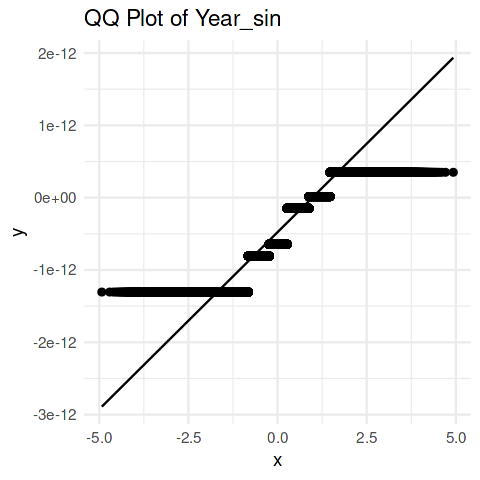

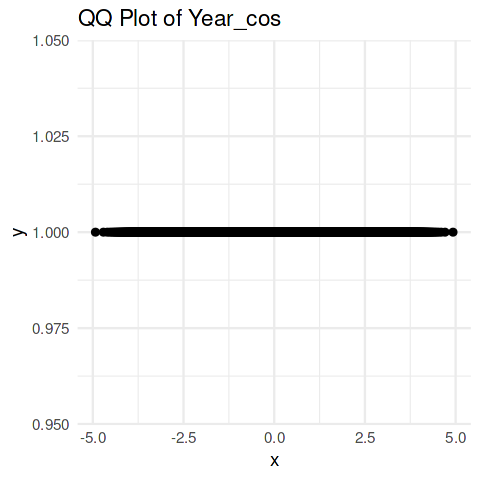

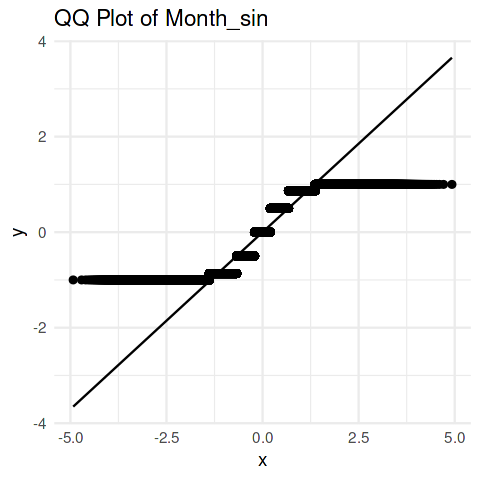

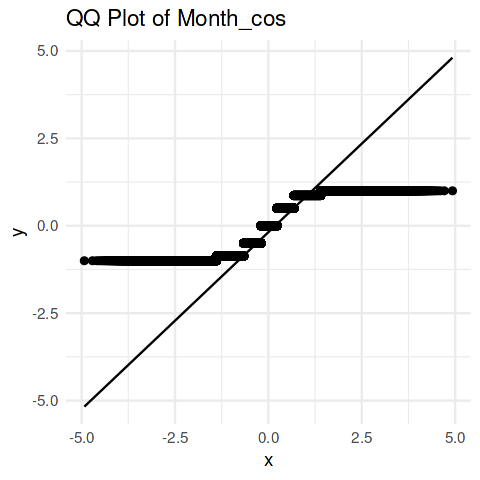

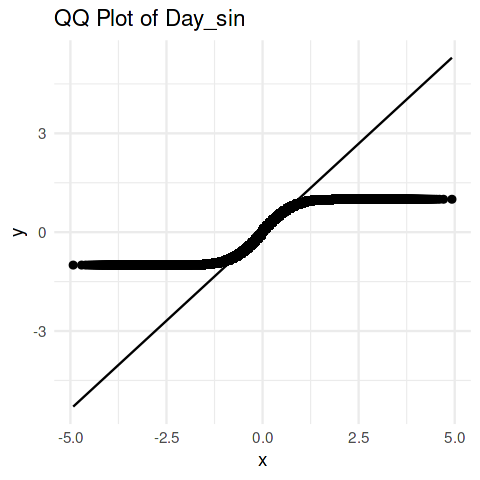

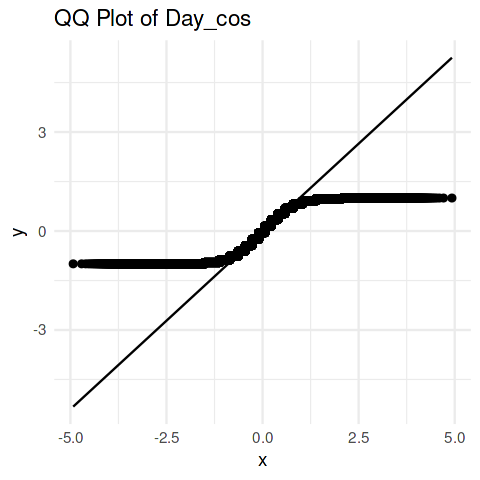

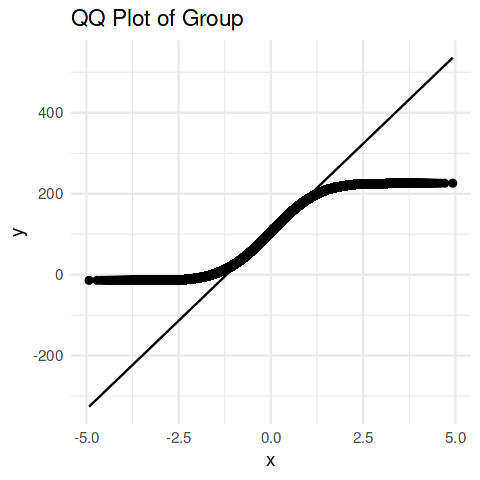

In [45]:
numeric_vars <- names(train)[sapply(train, is.numeric)]

options(
  repr.plot.width = 4,   
  repr.plot.height = 4   
)

for (var in numeric_vars) {
  p <- ggplot(train, aes(sample = .data[[var]])) +
    stat_qq() +
    stat_qq_line() +
    ggtitle(paste("QQ Plot of", var)) +
    theme_minimal()
  
  print(p)
}

In [46]:
str(train)

'data.frame':	1200000 obs. of  32 variables:
 $ Age                 : num  19 39 23 21 21 29 41 48 21 44 ...
 $ Gender              : chr  "Female" "Female" "Male" "Male" ...
 $ Annual.Income       : num  10049 31678 25602 141855 39651 ...
 $ Marital.Status      : chr  "Married" "Divorced" "Divorced" "Married" ...
 $ Number.of.Dependents: num  1 3 3 2 1 1 0 2 3 2 ...
 $ Education.Level     : chr  "Bachelor's" "Master's" "High School" "Bachelor's" ...
 $ Occupation          : chr  "Self-Employed" "" "Self-Employed" "" ...
 $ Health.Score        : num  22.6 15.6 47.2 10.9 20.4 ...
 $ Location            : chr  "Urban" "Rural" "Suburban" "Rural" ...
 $ Policy.Type         : chr  "Premium" "Comprehensive" "Premium" "Basic" ...
 $ Previous.Claims     : num  2 1 1 1 0 2 2 1 1 1 ...
 $ Vehicle.Age         : num  17 12 14 0 8 4 8 11 10 9 ...
 $ Credit.Score        : num  372 694 NA 367 598 614 807 398 685 635 ...
 $ Insurance.Duration  : num  5 2 3 1 4 5 6 5 8 3 ...
 $ Customer.Feedback   : ch

In [47]:
train <- train %>%
  filter(
    Premium.Amount > quantile(Premium.Amount, 0.25),
    Premium.Amount < quantile(Premium.Amount, 0.75)
  )

In [48]:
train <- train %>%
  filter(
    Annual.Income > quantile(Annual.Income, 0.25, na.rm = TRUE),
    Annual.Income < quantile(Annual.Income, 0.75, na.rm = TRUE)
  )

In [49]:
train <- train %>%
  filter(
    Previous.Claims < quantile(Previous.Claims, 0.75, na.rm = TRUE)
  )

**7.Create a model &　Ensemble**

In [50]:
set.seed(123)

data_split <-
  initial_split(train, strata = Premium.Amount)

train_data <- training(data_split)
test_data  <- testing(data_split)

In [51]:
set.seed(123)

rec <- recipe(Premium.Amount　~ ., data = train_data) %>%
　step_impute_median(all_numeric_predictors())%>%
  step_corr(all_numeric(), threshold = .98) %>%
　step_YeoJohnson(all_numeric_predictors()) %>% 
  step_normalize(all_numeric_predictors()) %>%
　step_novel(all_nominal_predictors())%>%
  step_zv()

In [52]:
rec2 <- recipe(Premium.Amount　~ ., data = train_data) %>%
　step_impute_median(all_numeric_predictors())%>%
  step_corr(all_numeric(), threshold = .98) %>%
　step_YeoJohnson(all_numeric_predictors()) %>% 
  step_normalize(all_numeric_predictors()) %>%
  step_dummy(all_nominal_predictors())%>%
　step_novel(all_nominal_predictors())%>%
  step_zv()

In [53]:
lgbm_spec <-
  boost_tree(
    trees = 727,
    tree_depth = 31,
    learn_rate = 0.02007938,
    mtry = 11,
    min_n = 11,
    loss_reduction = 360571.3
  ) %>%
  set_engine(engine = "lightgbm",
             lambda_l2 = 0.03977667923976626,
             lambda_l1 = 0.08851731976964569,
             is_unbalance = TRUE,
             num_leaves = 94,
             nthread  = future::availableCores()
) %>%
  set_mode(mode = "regression")

In [54]:
lgbm_spec2 <-
  boost_tree(
    trees = 1796,
    tree_depth = 75,
    learn_rate = 0.02670946,
    mtry = 19,
    min_n = 60,
    loss_reduction = 14.10027
  ) %>%
  set_engine(engine = "lightgbm",
             is_unbalance = TRUE,
             num_leaves = 10,
             nthread  = future::availableCores()
) %>%
  set_mode(mode = "regression")

In [55]:
xg_spec <- 
  boost_tree(
    trees = 3000,
    tree_depth = 9,
    learn_rate = 0.01,
    mtry = 12,
    min_n = 13,
    loss_reduction = 0.353
  ) %>%
  set_engine("xgboost",
             subsample = 0.895,
             reg_alpha = 0.353,
             reg_lambda = 0.956,
             max_bin = 8000,
             tree_method = "hist",
             eval_metric = "rmse") %>%
  set_mode("regression")

In [56]:
nn_spec <-
  mlp(hidden_units = 21,
      penalty = 3.798473, 
      epochs = 60) %>%
  set_engine('nnet') %>%
  set_mode('regression')

In [57]:
wf <- workflow() %>% 
  add_model(lgbm_spec) %>% 
  add_recipe(rec)

In [58]:
wf1 <- workflow() %>% 
  add_model(lgbm_spec2) %>% 
  add_recipe(rec)

In [59]:
wf2 <- workflow() %>% 
  add_model(xg_spec) %>% 
  add_recipe(rec2)

In [60]:
wf3 <- workflow() %>% 
  add_model(nn_spec) %>% 
  add_recipe(rec2)

In [61]:
fit<- wf %>%
  fit(data = train_data)

In [62]:
fit1<- wf1 %>%
  fit(data = train_data)

In [63]:
fit2<- wf2 %>%
  fit(data = train_data)

In [64]:
#fit3<- wf3%>%
#  fit(data = train_data)

In [65]:
predictions <- predict(fit, new_data = test_data, type = "numeric") %>%
  bind_cols(test_data) 

In [66]:
predictions1 <- predict(fit1, new_data = test_data, type = "numeric") %>%
  bind_cols(test_data) 

In [67]:
predictions2 <- predict(fit2, new_data = test_data, type = "numeric") %>%
  bind_cols(test_data) 

In [68]:
#predictions3 <- predict(fit3, new_data = test_data, type = "numeric") %>%
#  bind_cols(test_data) 

In [69]:
result <- rmse(predictions, truth = Premium.Amount, .pred)

In [70]:
result1 <- rmse(predictions1, truth = Premium.Amount, .pred)

In [71]:
result2 <- rmse(predictions2, truth = Premium.Amount, .pred)

In [72]:
#result3 <- rmse(predictions3, truth = Premium.Amount, .pred)

In [73]:
result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,278.2363


In [74]:
result1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,279.0914


In [75]:
result2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,281.7962


In [76]:
#result3

In [77]:
final_fit<- wf %>%
  fit(data = train)

In [78]:
final_fit1<- wf1 %>%
  fit(data = train)

In [79]:
final_fit2<- wf2 %>%
  fit(data = train)

In [80]:
#final_fit3<- wf3 %>%
#  fit(data = train)

In [81]:
pred <- predict(final_fit, new_data = test, type = "numeric")

In [82]:
pred1 <- predict(final_fit1, new_data = test, type = "numeric")

In [83]:
pred2 <- predict(final_fit2, new_data = test, type = "numeric")

In [84]:
#pred3 <- predict(final_fit3, new_data = test, type = "numeric")

In [85]:
PRE <- cbind(pred, pred1,pred2)

In [86]:
PRE$go <- (PRE[,1]*0.3+PRE[,2]*0.2+PRE[,3]*0.5)

In [87]:
sub<-cbind(id,pred)

In [88]:
sub1<-cbind(id,pred1)

In [89]:
sub2<-cbind(id,pred2)

In [90]:
#sub3<-cbind(id,pred3)

In [91]:
sub10<-cbind(id,PRE[,3])

In [92]:
colnames(sub)<-c("id","Premium Amount")

In [93]:
colnames(sub1)<-c("id","Premium Amount")

In [94]:
colnames(sub2)<-c("id","Premium Amount")

In [95]:
colnames(sub10)<-c("id","Premium Amount")

In [96]:
#colnames(sub3)<-c("id","Premium Amount")

In [97]:
write.csv(sub,"submission.csv",quote = FALSE, row.names = FALSE)
write.csv(sub1,"submission1.csv",quote = FALSE, row.names = FALSE)
write.csv(sub2,"submission2.csv",quote = FALSE, row.names = FALSE)
write.csv(sub10,"submission10.csv",quote = FALSE, row.names = FALSE)
#write.csv(sub3,"submission3.csv",quote = FALSE, row.names = FALSE)

In [98]:
head(sub)

,id,Premium Amount
,<int>,<dbl>
1,1200000,914.7295
2,1200001,929.9293
3,1200002,919.0886
4,1200003,916.3006
5,1200004,912.4510
6,1200005,937.4319


In [99]:
head(sub1)

,id,Premium Amount
,<int>,<dbl>
1,1200000,871.9665
2,1200001,919.1739
3,1200002,928.5281
4,1200003,904.1065
5,1200004,928.9579
6,1200005,886.3071


In [100]:
head(sub2)

,id,Premium Amount
,<int>,<dbl>
1,1200000,871.5447
2,1200001,834.7308
3,1200002,938.7108
4,1200003,952.0784
5,1200004,952.1579
6,1200005,830.6973


In [101]:
head(sub10)

id,Premium Amount
1200000,871.5447
1200001,834.7308
1200002,938.7108
1200003,952.0784
1200004,952.1579
1200005,830.6973


**STACKING**

In [102]:
set.seed(123)

rec <- recipe(Premium.Amount　~ ., data = train_data) %>%
　step_impute_median(all_numeric_predictors())%>%
　step_YeoJohnson(all_numeric_predictors()) %>% 
  step_normalize(all_numeric_predictors()) %>%
　step_novel(all_nominal_predictors())

In [103]:
set.seed(321)

cv_fold <- vfold_cv (train_data, v = 6,strata = "Premium.Amount")

In [104]:
lgbm_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "lightgbm",
             is_unbalance = TRUE,
             num_leaves = tune(),
             lambda_l2 = 0.03977667923976626,
             lambda_l1 = 0.08851731976964569,
             nthread  = future::availableCores()
) %>%
  set_mode(mode = "regression")

In [105]:
wf <- workflow() %>% 
  add_model(lgbm_spec) %>% 
  add_recipe(rec)

In [106]:
rmsle_impl <- function(truth, estimate, case_weights = NULL) {
      sqrt( mean(  ((log1p(truth) - log1p(estimate))^2 )))
    
}


rmsle_vec <- function(truth, estimate, na_rm = TRUE, case_weights = NULL, ...) {
  check_numeric_metric(truth, estimate, case_weights)

  if (na_rm) {
    result <- yardstick_remove_missing(truth, estimate, case_weights)

    truth <- result$truth
    estimate <- result$estimate
    case_weights <- result$case_weights
  } else if (yardstick_any_missing(truth, estimate, case_weights)) {
    return(NA_real_)
  }

  rmsle_impl(truth, estimate, case_weights = case_weights)
}

rmsle <- function(data, ...) {
  UseMethod("rmsle")
}

rmsle <- new_numeric_metric(rmsle, direction = "minimize")

rmsle.data.frame <- function(data, truth, estimate, na_rm = TRUE, case_weights = NULL, ...) {

  numeric_metric_summarizer(
    name = "rmsle",
    fn = rmsle_vec,
    data = data,
    truth = !!enquo(truth),
    estimate = !!enquo(estimate),
    na_rm = na_rm,
    case_weights = !!enquo(case_weights)
  )
}

metric_set(rmsle)

A metric set, consisting of:
- `rmsle()`, a numeric metric | direction: minimize

In [107]:
params <- wf %>%
  extract_parameter_set_dials() %>%
  update(trees = trees(c(50,2200)),
    mtry = mtry(range = c(3,21)),
         min_n = min_n(range = c(25, 90)),
         tree_depth = tree_depth(range = c(3, 40)),
         learn_rate = learn_rate(range = c(-3.2, -1.5)),
         loss_reduction = loss_reduction(c(1, 20)),
         num_leaves = num_leaves(range = c(200, 300))) %>%
  finalize(train_data)

In [108]:
set.seed(123)

lgbm_res <- tune_grid(
  wf,
  resamples = cv_fold,
  grid = 50,
  metrics = metric_set(rmsle),
  param_info = params,
  control = control_grid(
    save_pred = TRUE,    # 予測値を保存
    save_workflow = TRUE # ワークフローを保存
  ))

→ A | warning: !  The following columns have zero variance so scaling cannot be used:
                 Previous.Claims and Year_cos.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.



There were issues with some computations   A: x1



→ B | warning: NaNs produced



There were issues with some computations   A: x1


There were issues with some computations   A: x1   B: x1



There were issues with some computations   A: x3   B: x1



There were issues with some computations   A: x4   B: x1



There were issues with some computations   A: x5   B: x1



There were issues with some computations   A: x6   B: x1



There were issues with some computations   A: x6   B: x1



ℹ The workflow being saved contains a recipe, which is 13.84 Mb ℹ in memory. If
this was not intentional, please set the ℹ control setting `save_workflow =
FALSE`.



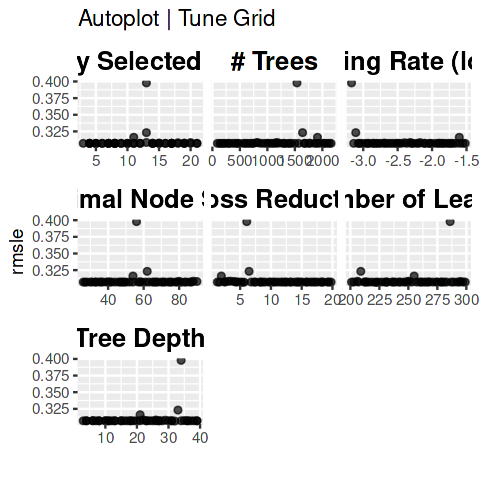

In [109]:
autoplot(lgbm_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    )
  ) +
  labs(title = "Autoplot | Tune Grid",
    y = "rmsle")

In [110]:
show_best(lgbm_res, metric = "rmsle") %>%
  kbl() %>%
  kable_classic(full_width = F, position = "left")

<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; width: auto !important; '>
 <thead>
  <tr>
   <th style="text-align:right;"> mtry </th>
   <th style="text-align:right;"> trees </th>
   <th style="text-align:right;"> min_n </th>
   <th style="text-align:right;"> tree_depth </th>
   <th style="text-align:right;"> learn_rate </th>
   <th style="text-align:right;"> loss_reduction </th>
   <th style="text-align:right;"> num_leaves </th>
   <th style="text-align:left;"> .metric </th>
   <th style="text-align:left;"> .estimator </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> std_err </th>
   <th style="text-align:left;"> .config </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 5 </td>
   <td style="text-align:right;"> 1354 </td>
   <td style="text-align:right;"> 81 </td>
   <td style="text-align:right;"> 32 </td>
   <td style="text-align:r

In [111]:
a<-select_best(lgbm_res, metric = "rmsle")

In [112]:
a

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,num_leaves,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
5,1354,81,32,0.009016132,239539.6,222,Preprocessor1_Model06


In [113]:
final_fit <- wf %>%
  finalize_workflow(select_best(lgbm_res, metric = "rmsle")) %>%
  fit(train)

In [114]:
pred <- predict(final_fit, new_data = test, type = "numeric")

In [115]:
sub<-cbind(id,pred)

In [116]:
colnames(sub)<-c("id","Premium Amount")

In [117]:
write.csv(sub,"submission100.csv",quote = FALSE, row.names = FALSE)

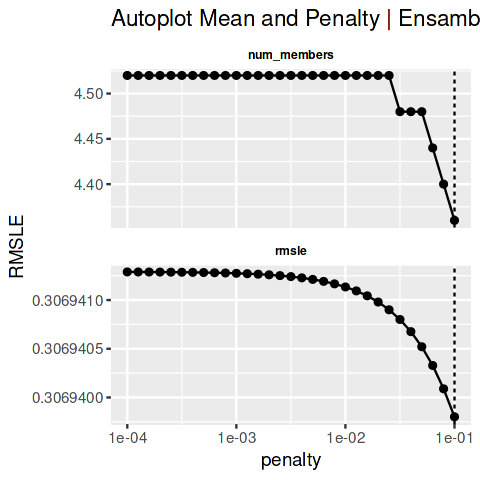

In [118]:
ensamble_stacking <- stacks() %>%  
  add_candidates(lgbm_res)%>% 
  stacks::blend_predictions(
    penalty = c(10^seq(-4,-1, 0.1)),
    metric = metric_set(rmsle),
    control = tune::control_grid(allow_par = TRUE)
  )

autoplot(ensamble_stacking) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 7
    )
  ) +
  labs(title = "Autoplot Mean and Penalty | Ensamble Stacking",
    y = "RMSLE")

In [119]:
ensemble <- fit_members(ensamble_stacking)

In [120]:
submit <- stacks::augment(ensemble, test) 

head(submit)

id,Age,Gender,Annual.Income,Marital.Status,Number.of.Dependents,Education.Level,Occupation,Health.Score,Location,⋯,Day_of_week,Week,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Group,.pred
<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1200000,28,Female,2310,,4,Bachelor's,Self-Employed,7.657981,Rural,⋯,Sunday,22,-6.447061e-13,1,1.224647e-16,-1.0000000,0.7247928,0.68896692,168,907.5424
1200001,31,Female,126031,Married,2,Master's,Self-Employed,13.381379,Suburban,⋯,Monday,17,1.585375e-14,1,8.660254e-01,-0.5000000,-0.9680771,-0.25065253,211,939.2793
1200002,47,Female,17092,Divorced,0,PhD,Unemployed,24.354527,Urban,⋯,Wednesday,14,-6.447061e-13,1,8.660254e-01,-0.5000000,0.8486443,0.52896401,160,920.5639
1200003,28,Female,30424,Divorced,3,PhD,Self-Employed,5.136225,Suburban,⋯,Wednesday,43,-6.447061e-13,1,-8.660254e-01,0.5000000,-0.9377521,0.34730525,187,921.3593
1200004,24,Male,10863,Divorced,2,High School,Unemployed,11.844155,Suburban,⋯,Friday,47,-1.468363e-13,1,-5.000000e-01,0.8660254,-0.8486443,0.52896401,95,911.6227
1200005,43,Male,52370,Married,2,Bachelor's,,5.386224,Suburban,⋯,Friday,27,-1.305266e-12,1,-5.000000e-01,-0.8660254,0.9987165,-0.05064917,125,950.5842


In [121]:
sub<-cbind(id,submit[,33])

In [122]:
colnames(sub)<-c("id","Premium Amount")

In [123]:
write.csv(sub,"submission150.csv",quote = FALSE, row.names = FALSE)

In [124]:
head(sub)

,id,Premium Amount
,<int>,<dbl>
1,1200000,907.5424
2,1200001,939.2793
3,1200002,920.5639
4,1200003,921.3593
5,1200004,911.6227
6,1200005,950.5842


In [125]:
tt <- read.csv("/kaggle/input/submission5/submission.csv", row.names= 1) 

In [126]:
ttsub<-cbind(sub[,2],tt)

In [127]:
ttsub$pred<-ttsub[,1]*0.3+ttsub[,2]*0.7

In [128]:
ttsub<-cbind(id,ttsub[,2])

In [129]:
colnames(ttsub)<-c("id","Premium Amount")

In [130]:
write.csv(ttsub,"submission200.csv",quote = FALSE, row.names = FALSE)